In [1]:
import pandas as pd
from sklearn.cluster import MeanShift
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect
import seaborn as sns
pd.set_option('max_rows', 5)
%matplotlib inline

# Mean Shift
---
特徴空間で、指定した距離内の密度に基づいてクラスタ数を求める手法。

iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


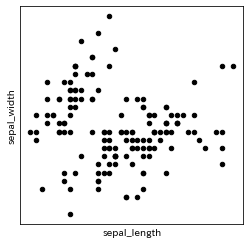

In [2]:
iris = sns.load_dataset('iris')
print('iris')
display(iris)
plt.figure(figsize=figaspect(1))
ax = plt.axes()
iris.plot.scatter('sepal_length', 'sepal_width', c='black', ax=ax)
ax.set(xticks=(), yticks=())
plt.show()

In [3]:
from my_functions.mean_shift import visualization
visualization.show(iris[['sepal_length', 'sepal_width']])

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='距離', max=0.9, min=0.3, read…

## PythonでのMean Shiftクラスタリング実行方法
---
`sklearn.clusterMeanShift`を用いる。 bandwidth は指定しなければ、自動的にアルゴリズムから決める。

In [4]:
help(MeanShift)

Help on class MeanShift in module sklearn.cluster._mean_shift:

class MeanShift(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  MeanShift(*, bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)
 |  
 |  Mean shift clustering using a flat kernel.
 |  
 |  Mean shift clustering aims to discover "blobs" in a smooth density of
 |  samples. It is a centroid-based algorithm, which works by updating
 |  candidates for centroids to be the mean of the points within a given
 |  region. These candidates are then filtered in a post-processing stage to
 |  eliminate near-duplicates to form the final set of centroids.
 |  
 |  Seeding is performed using a binning technique for scalability.
 |  
 |  Read more in the :ref:`User Guide <mean_shift>`.
 |  
 |  Parameters
 |  ----------
 |  bandwidth : float, default=None
 |      Bandwidth used in the RBF kernel.
 |  
 |      If not given, the bandwidth is estimated using
 |      sklearn.cl

In [5]:
ms = MeanShift(n_jobs=-1)
data = iris[['petal_length', 'petal_width']].values
ms.fit(data)
pred = ms.predict(data)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


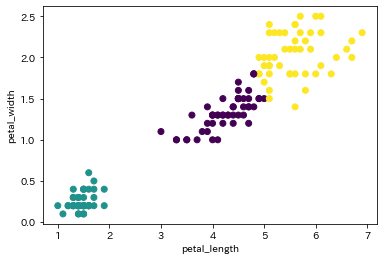

In [6]:
plt.scatter(data[:, 0], data[:, 1], c=pred)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

練習問題

---
mpg データセットの任意の変数 (複数) を元に Mean Shift クラスタリングを実行する。その後、得られたクラスタに何らかの意味づけができそうか考える。

In [7]:
mpg = sns.load_dataset('mpg')
print('mpg')
display(mpg)

mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10
